<img width="300" src="https://raw.githubusercontent.com/bghaendler/BJBS-AI-LAB/master/img/BJBSAILogo.png" align="right"> 
# **BJBS AI : MINST Database - Multi class classification**
#### (BJBS AI Session 2 - 10 March 2021)



Ref: [link](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)


<img src="https://anatomiesofintelligence.github.io/img/m/mnist-dataset-sample.gif" width="300">

- One of the most amazing things about Python’s scikit-learn library is that is has a 4-step modeling pattern that makes it easy to code a machine learning classifier. 
- More information about MINST Database here [link](http://yann.lecun.com/exdb/mnist/)

## **Starting**

### **Downloading the Data (MNIST)**
  - The MNIST dataset doesn’t come from within scikit-learn

In [1]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [2]:

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


to see that there are 70000 images and 70000 labels in the dataset
### **Splitting Data into Training and Test Sets (MNIST)**
The code below splits the data into training and test data sets. The test_size=1/7.0 makes the training set size 60,000 images and the test set size of 10,000.

In [3]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=0)

### **Showing the Images and Labels (MNIST)**

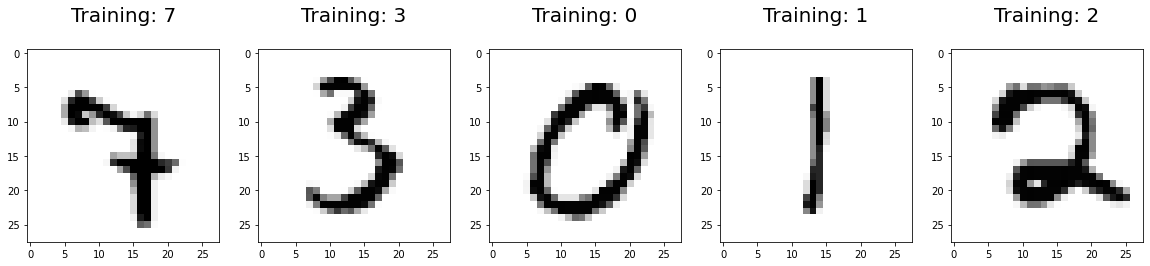

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap="Greys")
  plt.title('Training: %i\n' % int(label), fontsize = 20)

## **Logistic Regression** For this first try I have 0.9184

### **Scikit-learn 4-Step Modeling Pattern (MNIST)**


#### **Step 1. Import the model you want to use**
In sklearn, all machine learning models are implemented as Python classes

In [5]:
from sklearn.linear_model import LogisticRegression

#### **Step 2. Make an instance of the Model**

Check here for the Solver selected: [Tips for Better Logistic Regression Models in Scikit-Learn](https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451)


In [6]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change to lbfgs
logisticRegr = LogisticRegression(solver = 'lbfgs')

#### **Step 3. Training the model on the data, storing the information learned from the data**
Model is learning the relationship between x (digits) and y (labels)

In [7]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### **Step 4. Predict the labels of new data (new images)**
Uses the information the model learned during the model training process

In [8]:
# Let's have a look on the image 10 - We predicted 1 and it is correct
logisticRegr.predict(test_img[10].reshape(1,-1))

array(['1'], dtype=object)

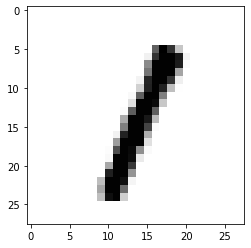

In [9]:
plt.imshow(np.reshape(test_img[10], (28,28)), cmap="Greys")

Make predictions on entire test data

In [10]:
predictions = logisticRegr.predict(test_img)

### **Measuring Model Performance (MNIST)**
- While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we are going to keep this simple and use accuracy as our metric.
To do this are going to see how the model performs on the new data (test set)
accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points

In [11]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9184


### **Display Misclassified images with Predicted Labels (MNIST)**
While I could show another confusion matrix, I figured people would rather see misclassified images on the off chance someone finds it interesting.
Getting the misclassified images’ index

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict: 
    misclassifiedIndexes.append(index)
  index +=1

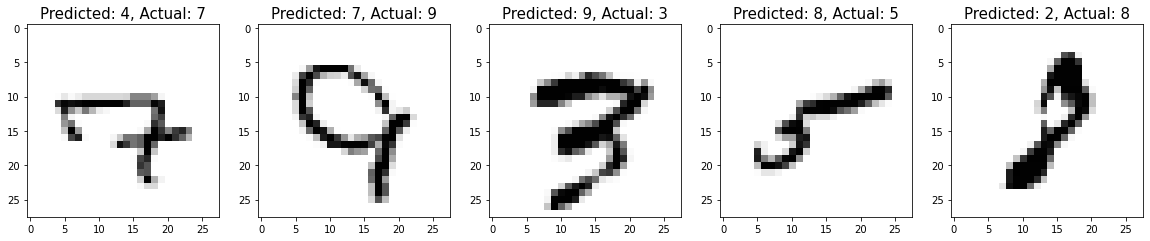

In [13]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap="Greys")
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


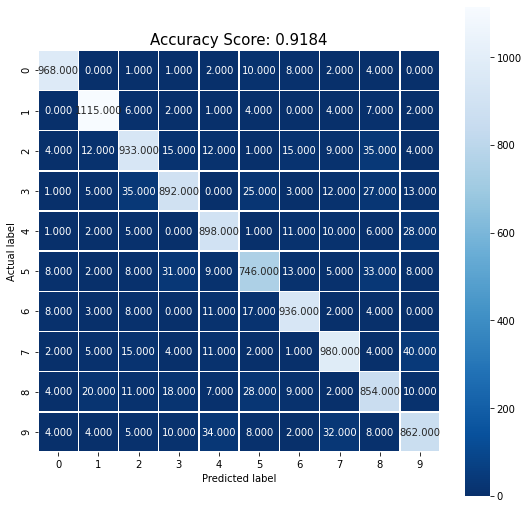

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## **Decision Tree**
Now no more explanations, directly to the code and to the results for this model
In this one I have 0.8694

0.8714


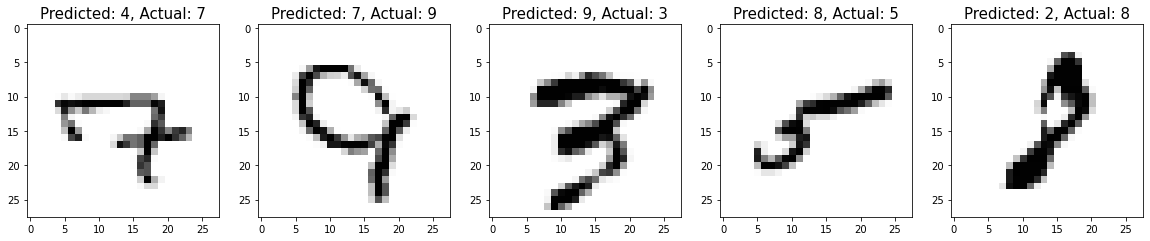

In [16]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree.fit(train_img, train_lbl)
dtree.predict(test_img[0].reshape(1,-1))
score = dtree.score(test_img, test_lbl)
print(score)
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict: 
    misclassifiedIndexes.append(index)
  index +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap="Greys")
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [17]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


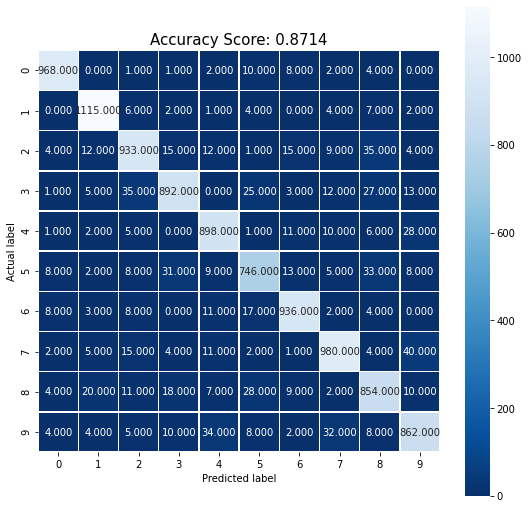

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## **Random Forest Classifier**
I got 0.9662 accuracy

In [19]:
from sklearn.ensemble import RandomForestClassifier
# all parameters not specified are set to their defaults
rforest = RandomForestClassifier()
rforest.fit(train_img, train_lbl)
predictions = rforest.predict(test_img)
score = rforest.score(test_img, test_lbl)
print(score)

0.9679


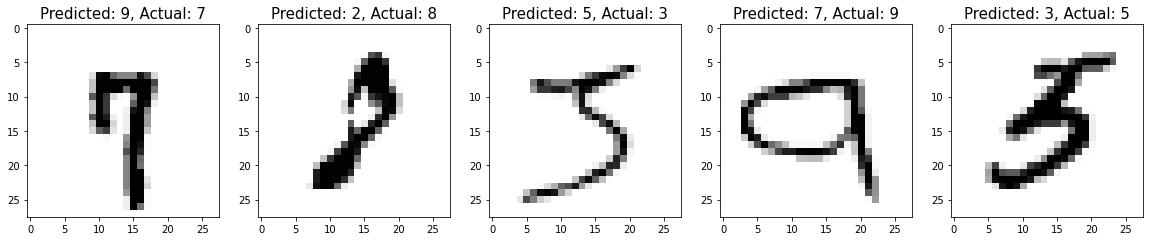

In [20]:

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict: 
    misclassifiedIndexes.append(index)
  index +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap="Greys")
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [21]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 985    0    1    0    1    2    3    0    4    0]
 [   0 1127    5    3    2    0    0    2    1    1]
 [   0    0 1018    4    1    0    4    5    7    1]
 [   0    1   16  957    0   13    1   10   11    4]
 [   0    0    0    0  939    0    4    2    3   14]
 [   0    0    2    7    2  830   10    1    4    7]
 [   5    0    0    0    1    8  972    0    3    0]
 [   4    5   16    0    4    0    0 1017    2   16]
 [   2    6    6    5    2    5    3    0  920   14]
 [   3    0    2   12   13    4    1   13    7  914]]


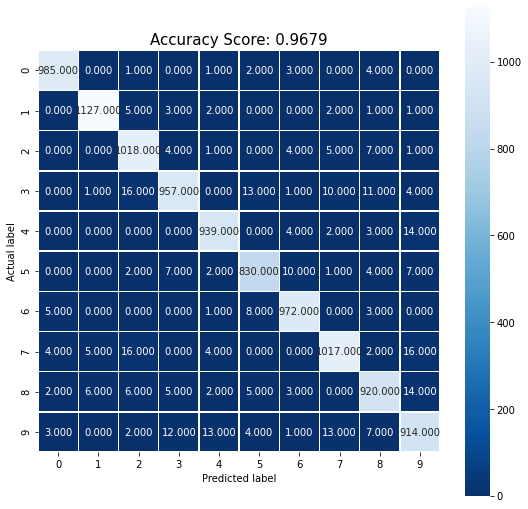

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## **KNeighborsClassifier**
- Commenting as it is a very slow

In [23]:
#from sklearn.neighbors import KNeighborsClassifier
# all parameters not specified are set to their defaults
#knn = KNeighborsClassifier()
#knn.fit(train_img, train_lbl)
#predictions = knn.predict(test_img)
#score = knn.score(test_img, test_lbl)
#print(score)

In [24]:
#index = 0
#misclassifiedIndexes = []
#for label, predict in zip(test_lbl, predictions):
#  if label != predict: 
#    misclassifiedIndexes.append(index)
#  index +=1
#plt.figure(figsize=(20,4))
#for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
# plt.subplot(1, 5, plotIndex + 1)
# plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap="Greys")
# plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [25]:
#cm = metrics.confusion_matrix(test_lbl, predictions)
#print(cm)

In [26]:
#plt.figure(figsize=(9,9))
#sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
#plt.ylabel('Actual label');
#plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

## **Naive Bayes**
Very fast but the resutl not good: 0.8202

In [27]:
from sklearn.naive_bayes import MultinomialNB
# all parameters not specified are set to their defaults
nbc = MultinomialNB()
nbc.fit(train_img, train_lbl)
predictions = nbc.predict(test_img)
score = nbc.score(test_img, test_lbl)
print(score)

0.8202


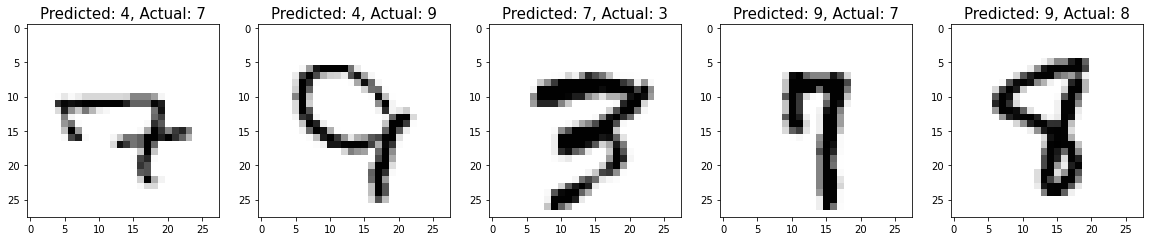

In [28]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict: 
    misclassifiedIndexes.append(index)
  index +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap="Greys")
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [29]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 906    0    5    5    1   11   15    0   53    0]
 [   0 1075    8    9    2    2    5    0   38    2]
 [  15   11  854   22    7    0   53   10   65    3]
 [   3   21   57  805    0   20    6   12   49   40]
 [   0    1    4    0  723    5   17    2   42  168]
 [  27    6   14  113   21  549   21    3   84   25]
 [  12   18   15    0    6   19  904    0   15    0]
 [   7   14   12    7   35    0    1  861   46   81]
 [   3   53   14   62   15   26    8    2  732   48]
 [   8   14    6   13   61    3    0   25   46  793]]


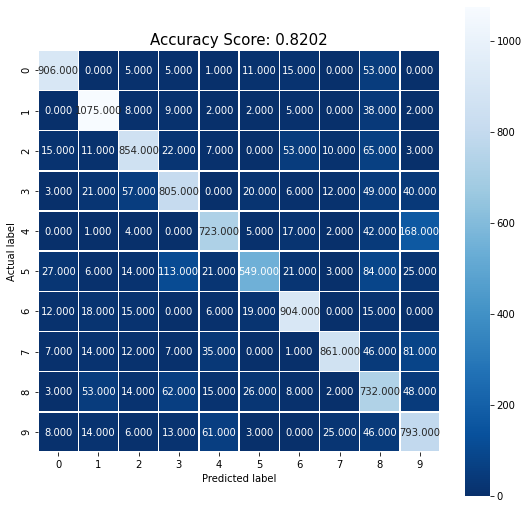

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## **Support Vector Machines**
I got 0.9777 Accuracy, and it was quite fast

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_img, train_lbl)
predictions = svc.predict(test_img)
score = svc.score(test_img, test_lbl)
print(score)

0.9777


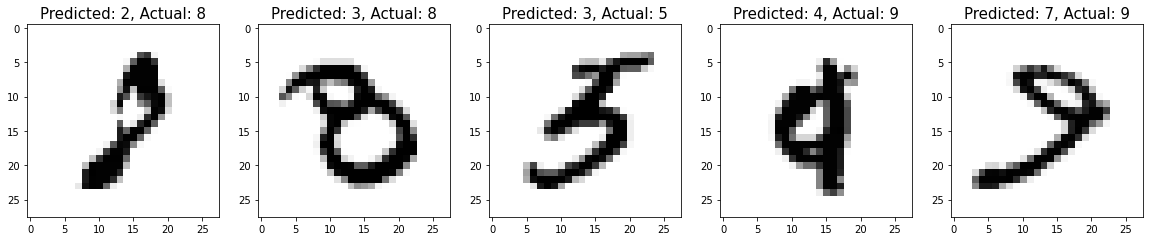

In [32]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict: 
    misclassifiedIndexes.append(index)
  index +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap="Greys")
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [33]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 988    0    1    0    0    3    3    0    1    0]
 [   0 1134    2    0    1    0    0    2    1    1]
 [   1    0 1020    2    4    0    2    5    5    1]
 [   0    1   11  973    0    9    0    4   13    2]
 [   1    1    1    0  946    1    1    4    0    7]
 [   0    1    3    7    1  838    7    0    5    1]
 [   5    0    0    0    3    5  974    0    2    0]
 [   1    3    7    0    9    1    1 1033    0    9]
 [   0    5    3    5    2    2    3    0  937    6]
 [   1    1    1    4   13    4    1    9    1  934]]


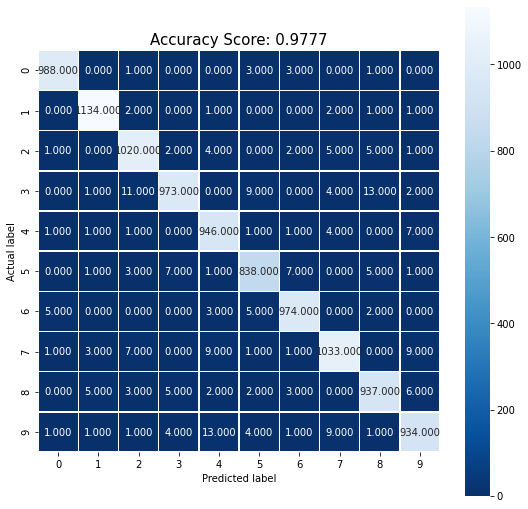

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## **Neural Networks using Tensorflow**

In [35]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### **Reshaping and Normalizing the Images**
To be able to use the dataset in Keras API, we need 4-dims NumPy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:


In [36]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### **Building the Convolutional Neural Network**


In [37]:
epochs = 50
batch_size = 64

In [38]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers.normalization import BatchNormalization

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [39]:
#!pip3 install ann_visualizer
#!pip install graphviz
#from ann_visualizer.visualize import ann_viz
from graphviz import Digraph
dot = Digraph(comment='The Round Table')
#dot.render('/content/network.gv', view=True)

In [40]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))

### **Data augmentation**
- In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. 
  - We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

  - For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

  - Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

- By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.



In [41]:
# With data augmentation to prevent overfitting
from keras.preprocessing.image import ImageDataGenerator



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

### **Compiling and Fitting the Model**
With the above code, we created a non-optimized empty CNN. Now it is time to set an optimizer with a given loss function that uses a metric. Then, we can fit the model by using our train data. We will use the following code for these tasks:

In [42]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data = test_gen)

Epoch 1/50
938/938 [==============================] - 54s 22ms/step - loss: 0.2481 - accuracy: 0.9224 - val_loss: 0.0511 - val_accuracy: 0.9832
Epoch 2/50
938/938 [==============================] - 20s 21ms/step - loss: 0.0606 - accuracy: 0.9829 - val_loss: 0.0570 - val_accuracy: 0.9837
Epoch 3/50
938/938 [==============================] - 20s 21ms/step - loss: 0.0477 - accuracy: 0.9857 - val_loss: 0.0777 - val_accuracy: 0.9744
Epoch 4/50
938/938 [==============================] - 20s 22ms/step - loss: 0.0436 - accuracy: 0.9872 - val_loss: 0.0308 - val_accuracy: 0.9906
Epoch 5/50
938/938 [==============================] - 20s 21ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0322 - val_accuracy: 0.9903
Epoch 6/50
938/938 [==============================] - 20s 21ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0390 - val_accuracy: 0.9890
Epoch 7/50
938/938 [==============================] - 20s 21ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0300 - val_accuracy:

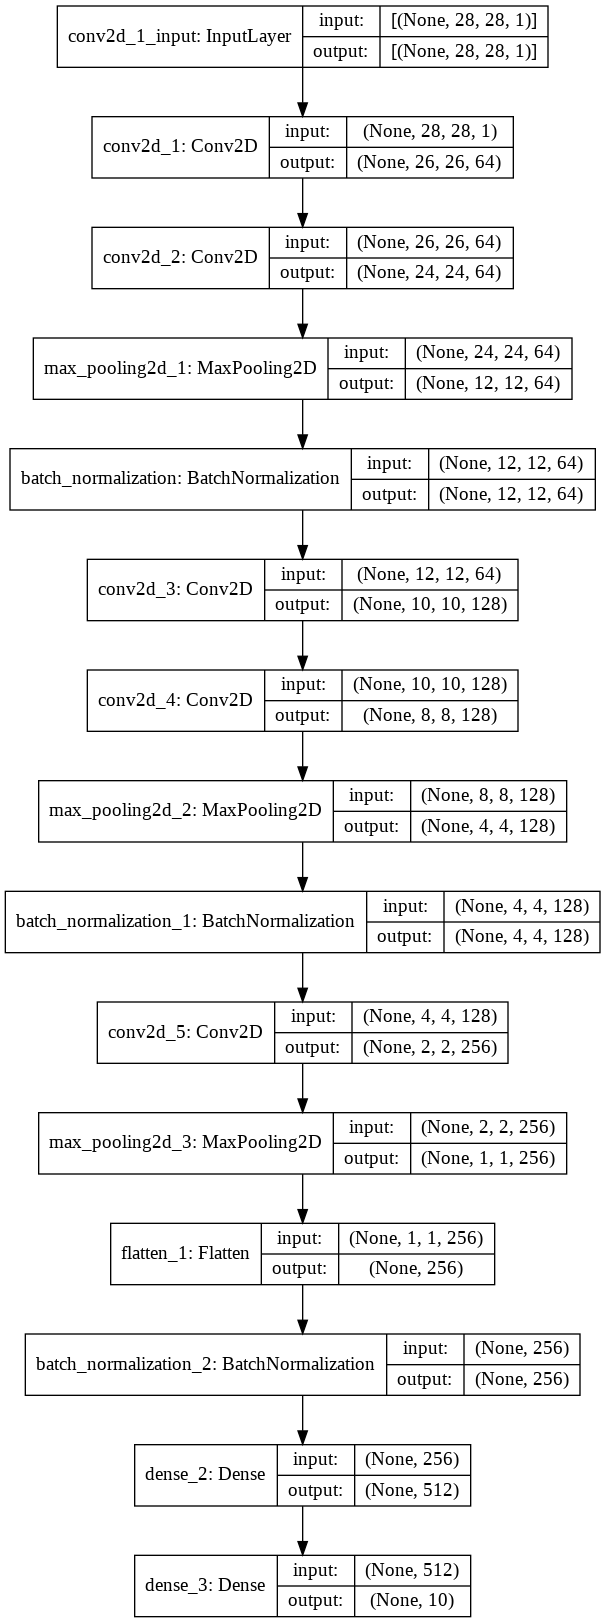

In [43]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, )

### **Evaluating the Model**
Finally, you may evaluate the trained model with x_test and y_test using one line of code:

In [44]:
score = model.evaluate(x_test, y_test)[1]
#model.evaluate(x_test, y_test)
score



313/313 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.9952


0.995199978351593

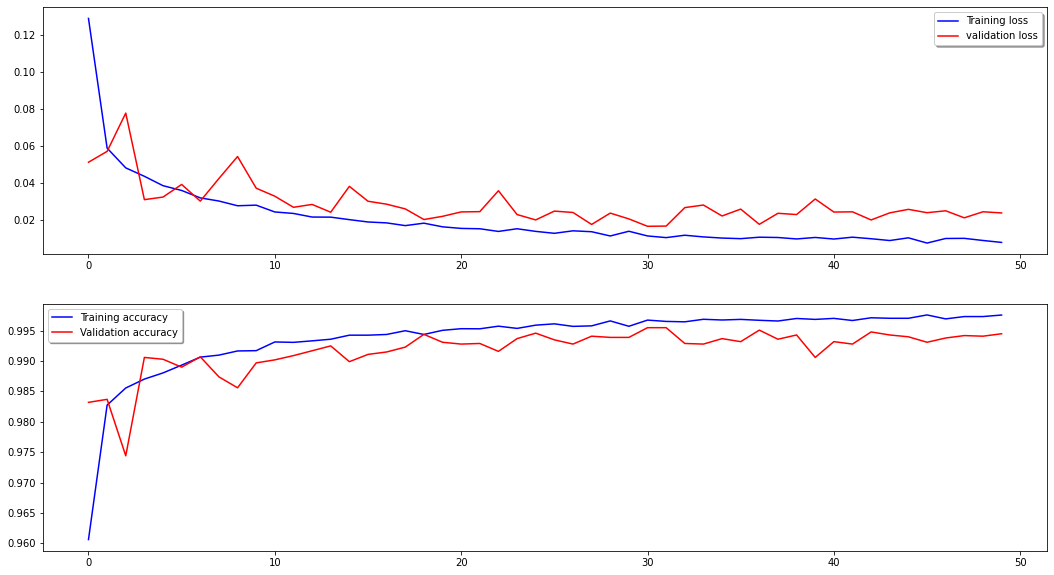

In [45]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(x_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = y_test # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
print(mat)




[[ 973    0    1    1    0    1    2    0    1    1]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   1    0 1027    1    0    0    0    3    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    1    1    0  975    0    0    0    0    5]
 [   0    0    0    2    0  889    1    0    0    0]
 [   1    1    0    0    0    2  953    0    1    0]
 [   0    2    3    1    0    0    0 1021    0    1]
 [   0    0    0    4    0    1    1    0  965    3]
 [   0    0    0    0    4    0    0    0    0 1005]]


<Figure size 720x720 with 0 Axes>

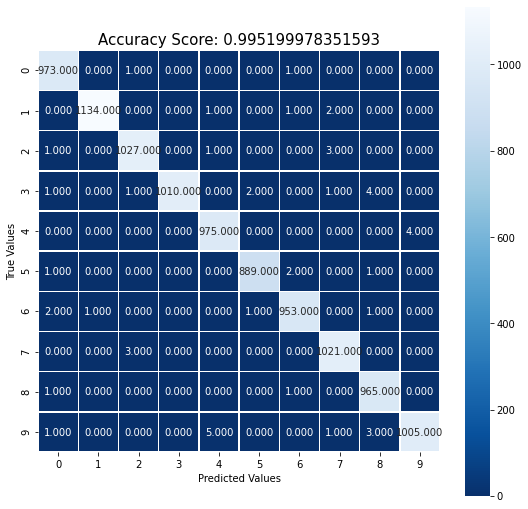

In [47]:
plt.figure(figsize=(9,9))
sns.heatmap(mat.T, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [48]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(Y_test, Y_pred):
  if label != predict: 
    misclassifiedIndexes.append(index)
  index +=1


IndexError: ignored

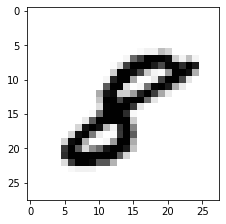

In [49]:
#@title
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap="Greys")
 plt.title("Predicted: {}, Actual: {}".format(Y_test[badIndex], fontsize = 15))
 #plt.title("Predicted: {}, Actual: {}".format(y_pred[badIndex], Y_test[badIndex]), fontsize = 15)